# Multivariate Exploratory Data Analysis

## Lesson Overview
Welcome to lesson three! Today, we will dive into creating, describing, and visualizing multivariate data relationships by using the Matplotlib, Pandas, and Seaborn libraries in Python.

By the end of this lesson you will be able to:
* Calculate the correlation coefficient
* Practice importing dataframes
* Build plots to describe multiple variables within a single dataset

Before we jump into our work with multivariate data, let's learn a bit more about our dataset itself.

In [11]:
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


### Correlation Coefficient 

To calculate correlation we will make use of the corr() function. Again, we will follow the format dataframe.corr()

**Meanings**:
* 1: Full correlation. If one variable increases, so does the other
* 0: No correlation.
* -1: Full negative correlation. If one variable increases, the other decreases.

In [49]:
# Let's see the correlation between concerts attended and shoe size. Should we expect a value closer to -1, 0 or 1?
penguins_corr = penguins.corr()
print(penguins_corr)

                     Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
Sample Number             1.000000           -0.236356          -0.022352   
Culmen Length (mm)       -0.236356            1.000000          -0.235053   
Culmen Depth (mm)        -0.022352           -0.235053           1.000000   
Flipper Length (mm)       0.040849            0.656181          -0.583851   
Body Mass (g)            -0.007042            0.595110          -0.471916   
Delta 15 N (o/oo)         0.006952           -0.059759           0.605874   
Delta 13 C (o/oo)        -0.488690            0.189025           0.429933   

                     Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
Sample Number                   0.040849      -0.007042           0.006952   
Culmen Length (mm)              0.656181       0.595110          -0.059759   
Culmen Depth (mm)              -0.583851      -0.471916           0.605874   
Flipper Length (mm)             1.000000       0.871202          -0.507

This table is quite confusing to look at, since it is showing us the correlation coefficient between **ALL** variables. So, if we want to look at two specific variables, we can use the same correlation table and indicate our variables by typing: correlationTable.loc["columnName", "columnName"]

In [48]:
# Let's check the correlation between Culmen Length and Culment Depth
culmen_corr = penguins_corr.loc["Culmen Length (mm)", "Culmen Depth (mm)"]
print(culmen_corr)

-0.23505287035553338


In [89]:
# As you can see above, it doesn't show non-existent combinationts (for example, dream and gentoo penguin).
# If we, however, would like to see those, we can type
# pd.crosstab(dataframe["columnName1"], dataframe["columnName2"]) and to_markdown() for nicer visualization

freq_three = pd.crosstab(penguins["Species"], penguins["Island"]).to_markdown()
print(freq_three)

| Species                                   |   Biscoe |   Dream |   Torgersen |
|:------------------------------------------|---------:|--------:|------------:|
| Adelie Penguin (Pygoscelis adeliae)       |       44 |      56 |          52 |
| Chinstrap penguin (Pygoscelis antarctica) |        0 |      68 |           0 |
| Gentoo penguin (Pygoscelis papua)         |      124 |       0 |           0 |


In [98]:
# If we want to see a table of proportions, we have to type
# pd.crosstab(dataframe["columnName1"], dataframe["columnName2"], normalize = True)

prop_one = pd.crosstab(penguins["Species"], penguins["Island"], normalize = True)
print(prop_one)

Island                                       Biscoe     Dream  Torgersen
Species                                                                 
Adelie Penguin (Pygoscelis adeliae)        0.127907  0.162791   0.151163
Chinstrap penguin (Pygoscelis antarctica)  0.000000  0.197674   0.000000
Gentoo penguin (Pygoscelis papua)          0.360465  0.000000   0.000000


In [97]:
# Verify that they add up to one

print(0.13 + 0.16 + 0.15+ 0.2 + 0.36)

1.0


## Multivariate Data Visualization

Now that we understand how Python can help us numerically analyze our multivariate data, let's see what Python's plotting tools can do to help visualize our data! Using the Matplotlib and Seaborn libraries for plot making, and the pandas library for importing data, we will learn how to create scatter plots, bar plots, linear model plots, and box plots to describe the relationships between variables in our dataset. 

We will practice loading libraries at the beginning of every new plot, but as a reminder, libraries only need to be imported once per Jupyter notebook. This repetition is meant to help you build the healthy habit of remembering to load your libraries at the beginning of your work. Now, let's begin!

### Scatter plot

Scatter plots are a helpful way to visualize the relationship between two variables in statistics. Using the Matplotlib library, we can create scatter plots for the same Penguins dataset that we have been working with thus far. 

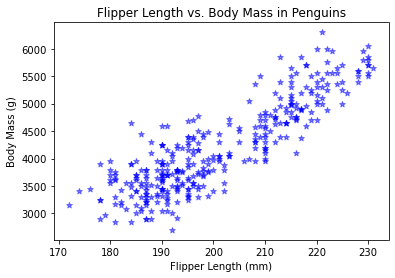

In [9]:
# As always, load libraries
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("penguins_lter.csv")

# Draw the scatter plot
plt.scatter(df["Flipper Length (mm)"], df["Body Mass (g)"], c = "blue", marker = "*", alpha = 0.5)

# Add x-axis and y-axis labels
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

# Add a title
plt.title("Flipper Length vs. Body Mass in Penguins")

# Display the graph
plt.show()

As we can see from creating the scatterplot above, there is a strong linear relationship between the flipper length of a penguin and its body mass. Great work!

### Bar plot
Bar plots are another helpful data visualization that statisticians use to compare the values of various groups. Bar plots can be both vertical and horizontal, and they offer a relationship between a categorical and a continuous variable. Let's practice making them both ways!

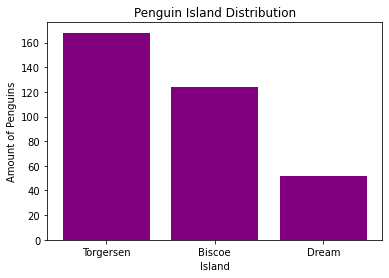

In [23]:
# Add libraries
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv("penguins_lter.csv")

# Plot the data
# The bar function requires at least an x value and a y value
plt.bar(df["Island"].unique(), df["Island"].value_counts(), color = 'purple')

# Add axis labels
plt.xlabel("Island")
plt.ylabel("Amount of Penguins")

# Add a title
plt.title("Penguin Island Distribution")

# Display the plot
plt.show()

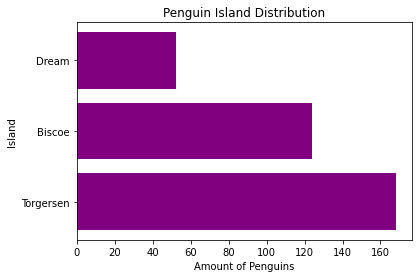

In [25]:
# Add libraries
import matplotlib.pyplot as plt

# Create data
df = pd.read_csv("penguins_lter.csv")

# Plot the data
# The barh function requires at least an x value and a y value
plt.barh(df["Island"].unique(), df["Island"].value_counts(), color = 'purple')

# Add axis labels
plt.xlabel("Amount of Penguins")
plt.ylabel("Island")

# Add a title
plt.title("Penguin Island Distribution")

# Display the plot
plt.show()

### lm plots
The lm plot displays the scattered data and fits a regression model onto it. It is exactly the same as putting the line of best fit onto our graph, and this process helps to understand the relationship between two variables. The method lmplot( ) takes the input of two column names (x and y) as a string and a DataFrame variable, and by default, fits the regression line. Let's try it out!

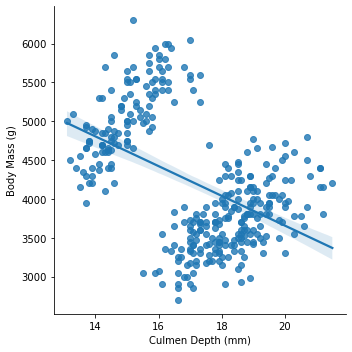

In [28]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
df = pd.read_csv("penguins_lter.csv")

# Create the plot
sns.lmplot(x = "Culmen Depth (mm)", y = 'Body Mass (g)', data = df)

# Display the plot
plt.show()

If we wanted to remove the regression line, we can set the parameter fig_reg to False within the lmplot( ) method.

In [39]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
df = pd.read_csv("penguins_lter.csv")

# Create the plot
sns.lmplot(x = "Culmen Depth (mm)", y = "Body Mass (g)", color = df.Species.astype('category').cat.codes, data = df, fit_reg = False)

# Display the plot
plt.show()

TypeError: lmplot() got an unexpected keyword argument 'color'

Side note: doesn't the above scatterplot look interesting? There are two clusters of data, which might hint that something else is going on in our data. This could be a result of the differences in penguin species or penguin sex. 

### Box plot
Box plots, or box-and-whisker plots, are another helpful visualization to understand the distribution of our data. Let's practice making a box plot in Seaborn using the same dataset from our previous example!

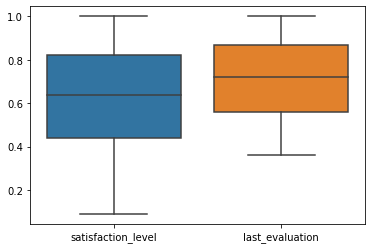

In [1]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
# We also do not need to create our dataframe more than once in a Jupyter notebook. 
# For the sake of practice, we'll do it again!
df = pd.read_csv("HR_comma_sep.csv")

# Create a box plot for the variables 'satisfaction_level' and 'last_evaluation'
sns.boxplot(data = df[['satisfaction_level', 'last_evaluation']])

# Display the plot
plt.show()

### Bar plots

We can also use seaborn to make more bar plots with advanced details. The bar() function intakes two columns (x and y) and a DataFrame, and outputs a colorful bar plot by default. Let's see an example!

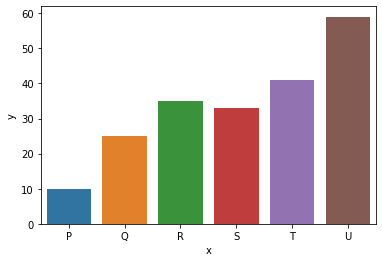

In [41]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
df = pd.DataFrame({'x': ['P','Q','R','S','T','U'],
                  'y': [10,25,35,33,41,59]})

# Create bar plot
sns.barplot(x ='x', y  ='y', data = df)

# Display the plot
plt.show()